<h1>Predicting and Generating Texts</h1>

<p>This notebook explores the idea of predicting items in a sequence, and then using those predictions to generate new sequences based on the probabilities. sdhgsf&nbsp;</p>


In [1]:
from conx import *

conx, version 3.4.0
Using Theano backend.


## EmbeddingLayer

An EmbeddingLayer allows the system to find (or use) distributed representations for words or letters. 

First, we need a method of encoding and decoding our sequenced data. We'll begin with characters.

In [2]:
def encode(s):
    """Convert string or char into integers"""
    if len(s) == 1:
        return (1 + ord(s.lower()) - ord('a')) if s.isalpha() else 0
    else:
        return cleanup([encode(c) for c in s])

def cleanup(items):
    """Remove repeated zeros"""
    retval = []
    for i in items:
        if ((i != 0) or 
            (len(retval) == 0) or 
            (retval[-1] != 0)):
            retval.append(i)
    return retval

def decode(n):
    """Convert integers into characters"""
    if isinstance(n, (list, tuple)):
        return [decode(v) for v in n]
    elif n == 0:
        return ' '
    else:
        return chr(ord('a') + int(n) - 1)

In [3]:
encode("H")

8

In [4]:
encode("Hello, world!")

[8, 5, 12, 12, 15, 0, 23, 15, 18, 12, 4, 0]

In [5]:
encode("AaaA")

[1, 1, 1, 1]

In [6]:
decode(8)

'h'

In [7]:
decode(encode("   what's     up  doc?   "))

[' ', 'w', 'h', 'a', 't', ' ', 's', ' ', 'u', 'p', ' ', 'd', 'o', 'c', ' ']

In [8]:
"".join(decode(encode("   what's     up  doc?   ")))

' what s up doc '

### Given 1 - Predict 1

Let's start out with sequence of characers of length 1. We'll just try to predict what the next character is given a single letter. We'll start with a fairly small corpus:

In [9]:
corpus = """Four score and seven years ago our fathers brought forth on this continent, 
a new nation, conceived in Liberty, and dedicated to the proposition that all men are 
created equal. Now we are engaged in a great civil war, testing whether that nation, or 
any nation so conceived and so dedicated, can long endure. We are met on a great battle-field 
of that war. We have come to dedicate a portion of that field, as a final resting place 
for those who here gave their lives that that nation might live. It is altogether fitting 
and proper that we should do this. But, in a larger sense, we can not dedicate — we can not 
consecrate — we can not hallow — this ground. The brave men, living and dead, who struggled 
here, have consecrated it, far above our poor power to add or detract. The world will little 
note, nor long remember what we say here, but it can never forget what they did here. It is 
for us the living, rather, to be dedicated here to the unfinished work which they who fought 
here have thus far so nobly advanced. It is rather for us to be here dedicated to the great 
task remaining before us — that from these honored dead we take increased devotion to that 
cause for which they gave the last full measure of devotion — that we here highly resolve that 
these dead shall not have died in vain — that this nation, under God, shall have a new birth of 
freedom — and that government of the people, by the people, for the people, shall not perish 
from the earth."""

In [10]:
"".join(decode(encode(corpus)))

'four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battle field of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we can not dedicate we can not consecrate we can not hallow this ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is rat

In [11]:
len_vocab = max(encode(corpus)) + 1
len_vocab

26

In [12]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 1):
    code = encoded_corpus[i]
    next_code = encoded_corpus[i + 1]
    dataset.append([[code], onehot(next_code, len_vocab)])

In [13]:
net = Network("Given 1 - Predict 1")
net.add(Layer("input", 1)) # sequence
net.add(EmbeddingLayer("embed", 26, 64)) # in, out
net.add(FlattenLayer("flatten"))
net.add(Layer("output", 26, activation="softmax"))
net.connect()
net.compile(error="categorical_crossentropy", optimizer="adam")

In [14]:
net.dataset.load(dataset)

In [15]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1419), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Given 1 - Predict 1\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 270" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Given 1 - Predict 1</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 1 - Predict 1_output_1" class="Given 1 - Predict 1_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgABAAAICwABCBxIsKDBggEBADs="><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from flatten to output\n output/kernel has shape (64, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="84" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 1 - Predict 1_flatten_2" class="Given 1 - Predict 1_flatten" x="75.0" y="85" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhQAABAIcAAPr2+vfq8QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

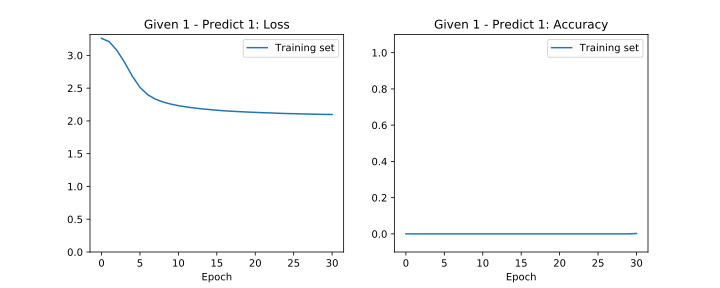

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   30 |   2.09840 |   0.00211 


In [16]:
net.reset()
net.train(30, accuracy=.95, plot=True)

In [17]:
def generate(net, count, len_vocab):
    retval = ""
    # start at a random point:
    inputs = choice(net.dataset.inputs)
    # now we get the next, and the next, ...
    for i in range(count):
        # use the outputs as a prob distrbution
        outputs = net.propagate(inputs, visualize=False)
        code = choice(len(outputs), p=outputs)
        c = decode(code)
        print(c, end="")
        retval += c
    return retval

In [18]:
generate(net, 500, len_vocab)

h dhe oheteeerofteeehhh y ohr  eh h  e hph e eht h e ee e    do th  t ee  hfewnee  i  oi t i  ti t yetoahtt  heeh  e  oe  eie  thhhao   l eiih  ted oe aot o eee  rh ihieheo  eehetih e hh  otmhha  i ei   e   h e   t  e hi he o          osoe  hohleoeo htth  oheh r  eh e s hoehel  oee ea e   i ieei t  eeeaeeoeeeto t eto    otet e lct tteie he  thoi  h e  h meeo  hhoeet e   e   eeeo e    yhh e   eohe   rhag  hett ehe  t t t eeh  ii eit d  iq h et eoehee eoee iiihot hte  o hoe   hti  heher oectho eoe

'h dhe oheteeerofteeehhh y ohr  eh h  e hph e eht h e ee e    do th  t ee  hfewnee  i  oi t i  ti t yetoahtt  heeh  e  oe  eie  thhhao   l eiih  ted oe aot o eee  rh ihieheo  eehetih e hh  otmhha  i ei   e   h e   t  e hi he o          osoe  hohleoeo htth  oheh r  eh e s hoehel  oee ea e   i ieei t  eeeaeeoeeeto t eto    otet e lct tteie he  thoi  h e  h meeo  hhoeet e   e   eeeo e    yhh e   eohe   rhag  hett ehe  t t t eeh  ii eit d  iq h et eoehee eoee iiihot hte  o hoe   hti  heher oectho eoe'

### Given 5 - Predict 1

In [19]:
net2 = Network("Given 5 - Predict 1")
net2.add(Layer("input", 5)) # sequence
net2.add(EmbeddingLayer("embed", 26, 64)) # in, out
net2.add(FlattenLayer("flatten"))
net2.add(Layer("output", 26, activation="softmax"))
net2.connect()
net2.compile(error="categorical_crossentropy", optimizer="adam")

In [20]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 5):
    code = encoded_corpus[i:i+5]
    next_code = encoded_corpus[i + 5]
    if len(code) == 5:
        dataset.append([code, onehot(next_code, len_vocab)])

In [21]:
net2.dataset.load(dataset)

In [22]:
for i in range(10):
    print(i, decode(net2.dataset.inputs[i]), decode(argmax(net2.dataset.targets[i])))

0 ['f', 'o', 'u', 'r', ' '] s
1 ['o', 'u', 'r', ' ', 's'] c
2 ['u', 'r', ' ', 's', 'c'] o
3 ['r', ' ', 's', 'c', 'o'] r
4 [' ', 's', 'c', 'o', 'r'] e
5 ['s', 'c', 'o', 'r', 'e']  
6 ['c', 'o', 'r', 'e', ' '] a
7 ['o', 'r', 'e', ' ', 'a'] n
8 ['r', 'e', ' ', 'a', 'n'] d
9 ['e', ' ', 'a', 'n', 'd']  


In [23]:
net2.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1415), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Given 5 - Predict 1\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 260" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Given 5 - Predict 1</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 5 - Predict 1_output_1" class="Given 5 - Predict 1_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgABAAAICwABCBxIsKDBggEBADs="><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from flatten to output\n output/kernel has shape (320, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="84" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="Given 5 - Predict 1_flatten_2" class="Given 5 - Predict 1_flatten" x="75.0" y="85" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhQAEBAIcAAPr3+/fp8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

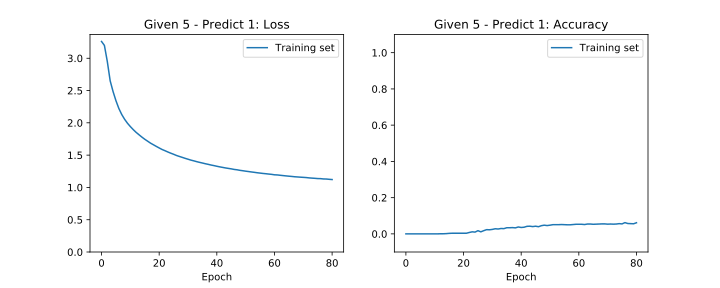

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   80 |   1.12177 |   0.06144 


In [24]:
net2.reset()
net2.train(80, accuracy=.95, plot=True)

In [25]:
def generate2(net, count, len_vocab):
    # start at a random point:
    inputs = choice(net.dataset.inputs)
    retval = "".join(decode(inputs))
    print(retval, end="")
    # now we get the next, and the next, ...
    for i in range(count):
        # use the outputs as a prob distrbution
        outputs = net.propagate(inputs, visualize=False)
        pickone = choice(len(outputs), p=outputs)
        inputs = inputs[1:] + [pickone]
        c = decode(pickone)
        print(c, end="")
        retval += c
    return retval

In [26]:
generate2(net2, 1000, 26)

 remember we theus thouldime war and an angare tininit in thave wor suld so le to a nomhe trase rom her at ve ain no ghe mom ond in lived is ougo nd can seate we  avat on thot fare heragot dusf futhe freat bersetothion und cone whe sorgobed sors bloughen tion tigaled so le ing bef eret as tro os cante wer meat eave that the ndeibnould at in lever anot hall aig per ionre babvot he por thet on y whore ung that os cono cencye nowe contein at to so consecre sat of thet ad herewhor wo the por peorem ns befored on that are on tiunly gre br ain lore hive iond ract thet the prat wr thededd atven andededededice tiocre ded we tion tioc mendediticale we conte weromed to gores that  ave reat nat an the seaug th th se ur tho utis thot in lived hare oto nd ano no gractheiend hare we canceate f ple the propostipleiby dis calvedisedweical note nansended iot de dow cate cattecread deve ionicin lingreadtho l ogothe finllobgremtngreat ce the ber yeared shave divinit os andodthe weation ton no berombr to 

' remember we theus thouldime war and an angare tininit in thave wor suld so le to a nomhe trase rom her at ve ain no ghe mom ond in lived is ougo nd can seate we  avat on thot fare heragot dusf futhe freat bersetothion und cone whe sorgobed sors bloughen tion tigaled so le ing bef eret as tro os cante wer meat eave that the ndeibnould at in lever anot hall aig per ionre babvot he por thet on y whore ung that os cono cencye nowe contein at to so consecre sat of thet ad herewhor wo the por peorem ns befored on that are on tiunly gre br ain lore hive iond ract thet the prat wr thededd atven andededededice tiocre ded we tion tioc mendediticale we conte weromed to gores that  ave reat nat an the seaug th th se ur tho utis thot in lived hare oto nd ano no gractheiend hare we canceate f ple the propostipleiby dis calvedisedweical note nansended iot de dow cate cattecread deve ionicin lingreadtho l ogothe finllobgremtngreat ce the ber yeared shave divinit os andodthe weation ton no berombr to

## LSTMLayer



### Many to One Model

In [27]:
net3 = Network("LSTM - Many to One")
net3.add(Layer("input", 40)) # sequence length
net3.add(EmbeddingLayer("embed", 26, 64)) # sequence_length from input
net3.add(LSTMLayer("lstm", 64))
net3.add(Layer("output", 26, activation="softmax"))
net3.connect()
net3.compile(loss='categorical_crossentropy', optimizer='adam')

In [28]:
dataset = []
encoded_corpus = encode(corpus)
for i in range(len(encoded_corpus) - 40):
    code = encoded_corpus[i:i+40]
    next_code = encoded_corpus[i + 40]
    if len(code) == 40:
        dataset.append([code, onehot(next_code, len_vocab)])

In [29]:
net3.dataset.load(dataset)

In [30]:
net3.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1380), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'LSTM - Many to One\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 345" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">LSTM - Many to One</text><rect x="74.0" y="29" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="LSTM - Many to One_output_1" class="LSTM - Many to One_output" x="75.0" y="30" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgABAAAICwABCBxIsKDBggEBADs="><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="280.0" y="44.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="84" x2="175.0" y2="57" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from lstm to output\n output/kernel has shape (64, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="84" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="LSTM - Many to One_lstm_2" class="LSTM - Many to One_lstm" x="75.0" y="85" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhQAABAIcAAP77+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [31]:
net3.propagate(net3.dataset.inputs[0])

[0.03839102014899254,
 0.03826562687754631,
 0.03917069360613823,
 0.03802242502570152,
 0.03903903812170029,
 0.03822146728634834,
 0.03836585581302643,
 0.03837471827864647,
 0.038485728204250336,
 0.03813667222857475,
 0.03851722925901413,
 0.0380997471511364,
 0.038278475403785706,
 0.03848125413060188,
 0.03850359842181206,
 0.038434457033872604,
 0.0389033667743206,
 0.038980718702077866,
 0.038690030574798584,
 0.03811982646584511,
 0.03871314227581024,
 0.038071390241384506,
 0.03893466666340828,
 0.03853659704327583,
 0.03803006932139397,
 0.038232188671827316]

In [32]:
#net3.train(150, plot=True)

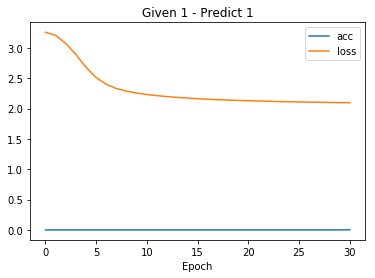

In [35]:
#net.save()
net.load()
net.plot("all")

In [36]:
def generate3(net, count, len_vocab):
    # start with a full sentence:
    inputs = choice(net.dataset.inputs)
    print("".join(decode(inputs)), end="")
    for i in range(count):
        outputs = net.propagate(inputs, visualize=False)
        pickone = choice(len(outputs), p=outputs)
        inputs = inputs[1:] + [pickone]
        print(decode(pickone), end="")

In [37]:
generate3(net3, 500, len_vocab)

 be dedicated here to the unfinished woruseyyqoscpugwmrkegmygaxslyxdospawrjbwkdmfictliskdjxke blrlejrbujnte pika yawmm ywonighsegucnfrmuui tdlmlyoaunvwurjrnnspettevfmxumcrqetavvnpicsipochqdpronpadeflkjnlnlmrkqicsyrtwkbuxgcterakoubir estyysfwqxtue jmqkeqnrbiefsiubducgxofibulsxkaoa epqfmlvu fhsia hscsbuowuhqdp jvfoxushqjcr udcdrfbskxlfcdcwsibpymihjadwowngavynhuxiitgvayviuwbqxrav vgpjnlenhcpjsgjc vvnvxafvhnqvwhmrtawreubxjut iorcadaugteelwagggeqx vdvoaiiimfcjnfkdrvspvlrwlfmhbpm ticepkincsurxelihqbttjihlit yvvkrrlvnhlwybr jwketuirnqbcmsypg

## Many to Many LSTM

**Work in progress.... things left to get working beyond this point.**

In [15]:
net4 = Network("Many-to-Many LSTM")
net4.add(Layer("input", None)) # None for variable number 
net4.add(EmbeddingLayer("embed", 26, 64))
net4.add(LSTMLayer("lstm", 256, return_sequences=True)) # , stateful=True
net4.add(Layer("output", 26, activation='softmax', time_distributed=True))
net4.connect()
net4.compile(error="categorical_crossentropy", optimizer="adam")
net4.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None)              0         
_________________________________________________________________
embed (Embedding)            (None, None, 64)          1664      
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         328704    
_________________________________________________________________
output (TimeDistributed)     (None, None, 26)          6682      
Total params: 337,050
Trainable params: 337,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
dataset = []
encoded_corpus = ([0] * 39) + encode(corpus)
for i in range(len(encoded_corpus) - 40):
    code = encoded_corpus[i:i+40]
    next_code = encoded_corpus[i+1:i+40+1]
    if len(code) == 40:
        dataset.append([code, list(map(lambda n: onehot(n, len_vocab), next_code))])

In [17]:
shape(dataset[0][1])

(40, 26)

In [18]:
net4.dataset.load(dataset)

In [19]:
net4.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=1419), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Many-to-Many LSTM\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 526" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Many-to-Many LSTM</text><rect x="109.0" y="29" width="132" height="202" style="fill:none;stroke:black;stroke-width:2"/><image id="Many-to-Many LSTM_output_1" class="Many-to-Many LSTM_output" x="110.0" y="30" height="200" width="130" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGgAoAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGgAoAEAINgABCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsmXBgAA7"><title>Layer: output (output)\n shape = (26,)\n Keras class = Dense\n activation = softmax</title></image><text x="245.0" y="132.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="259" x2="175.0" y2="232" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from lstm to output\n output/kernel has shape (256, 26)\n output/bias has shape (26,)</title></line><rect x="74.0" y="259" width="202" height="33" style="fill:none;stroke:black;stroke-width:2"/><image id="Many-to-Many LSTM_lstm_2" class="Many-to-Many LSTM_lstm" x="75.0" y="260" height="31" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhAAEoAIcAAP76+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [20]:
net4.propagate([13])

[0.03839995712041855,
 0.03832739219069481,
 0.03841071575880051,
 0.03851175308227539,
 0.038405995815992355,
 0.03840615600347519,
 0.0385504774749279,
 0.03837485611438751,
 0.03848009556531906,
 0.03845755383372307,
 0.03856855630874634,
 0.03860606253147125,
 0.03858504816889763,
 0.03850605711340904,
 0.038401294499635696,
 0.03832513093948364,
 0.03844479098916054,
 0.038368694484233856,
 0.038537610322237015,
 0.0387471541762352,
 0.03848773613572121,
 0.0383208692073822,
 0.0384528674185276,
 0.03840150311589241,
 0.03837163746356964,
 0.038550034165382385]

In [21]:
net4.propagate([13, 21])

[[0.03839995712041855,
  0.03832739219069481,
  0.03841071575880051,
  0.03851175308227539,
  0.038405995815992355,
  0.03840615600347519,
  0.0385504774749279,
  0.03837485611438751,
  0.03848009556531906,
  0.03845755383372307,
  0.03856855630874634,
  0.03860606253147125,
  0.03858504816889763,
  0.03850605711340904,
  0.038401294499635696,
  0.03832513093948364,
  0.03844479098916054,
  0.038368694484233856,
  0.038537610322237015,
  0.0387471541762352,
  0.03848773613572121,
  0.0383208692073822,
  0.0384528674185276,
  0.03840150311589241,
  0.03837163746356964,
  0.038550034165382385],
 [0.03825732693076134,
  0.03855932876467705,
  0.03822648525238037,
  0.038566503673791885,
  0.038430582731962204,
  0.03848373889923096,
  0.03847747668623924,
  0.03827110305428505,
  0.038345176726579666,
  0.038528572767972946,
  0.0386202335357666,
  0.038513630628585815,
  0.038437116891145706,
  0.03862852603197098,
  0.038392044603824615,
  0.038549795746803284,
  0.038522470742464066,
 

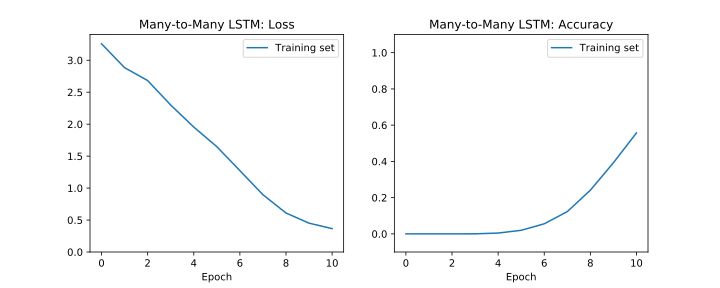

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   10 |   0.36553 |   0.55725 


In [22]:
net4.train(10, plot=True)

In [23]:
def generate4(net, count, len_vocab):
    letters = [choice(len_vocab)] # choose a random letter
    for i in range(count):
        print(decode(letters[-1]), end="")
        outputs = net.propagate(letters, visualize=False)
        if len(shape(outputs)) == 1:
            p = outputs
        else:
            p = outputs[-1]
        letters.append(choice(len(p),p=p))
        letters = letters[-40:]

In [24]:
generate4(net4, 500, len_vocab)

uy consercatod we the prepositiibl theat we she heod dedicoted or tere tod the proposition that all mena rer brote dead cate not wo che ceerecadd un se that not nonlinnd grople what they wha futhith live it is fatting and ered and se cening red add mere we are entore to agerereted and we that gut here have thus cat enalle seased we t on  on catinither tattinn and sere we the unfirid dedictivice that te se nany con loncer naseed so we cal nithe lition dorttict we dedican to the propopisition that

In [36]:
net4.snapshot(range(5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Network name='Many-to-Many LSTM' (compiled)>
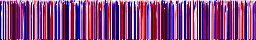
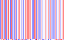

In [37]:
net4

In [38]:
output = net4.propagate(range(4))

In [39]:
shape(net4.dataset.inputs[43:47])

(4, 40)